Simple Linear MAE: 0.6299 (Avg error ~$62,991)
Multiple Linear MAE: 0.5332 (Avg error ~$53,320)


/tmp/ipython-input-2235253519.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='MAE', data=metrics_df, palette='Oranges')


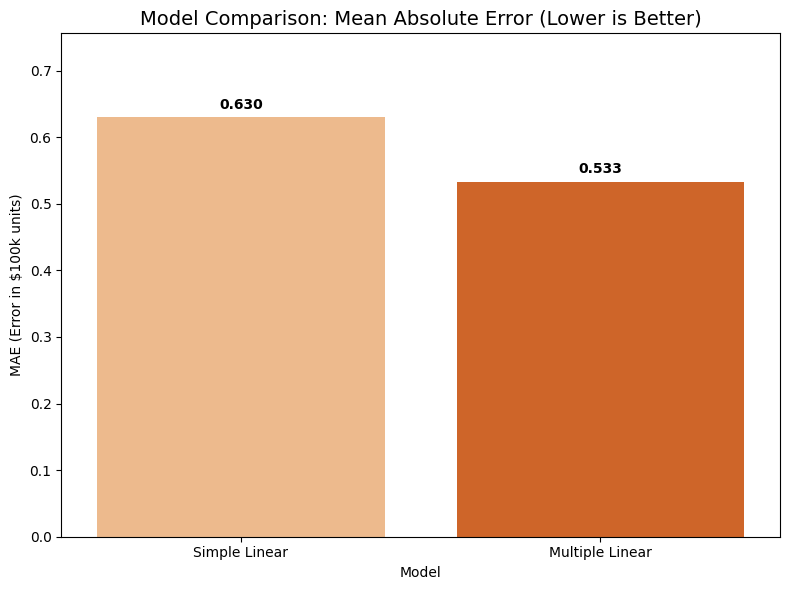

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 1. Load Dataset (California Housing)
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target_Price'] = data.target # Price in $100,000s

# 2. Define Models

# Simple: Use only 'MedInc' (Median Income)
X_simple = df[['MedInc']]

# Multiple: Use all 8 features
X_multi = df.drop('Target_Price', axis=1)
y = df['Target_Price']

# 3. Split Data
X_train_s, X_test_s, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)
X_train_m, X_test_m, _, _ = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# 4. Train Models
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train)

# 5. Predict
pred_simple = model_simple.predict(X_test_s)
pred_multi = model_multi.predict(X_test_m)

# 6. Calculate MAE
mae_simple = mean_absolute_error(y_test, pred_simple)
mae_multi = mean_absolute_error(y_test, pred_multi)

print(f"Simple Linear MAE: {mae_simple:.4f} (Avg error ~${mae_simple*100000:,.0f})")
print(f"Multiple Linear MAE: {mae_multi:.4f} (Avg error ~${mae_multi*100000:,.0f})")

# 7. Visualization
metrics_df = pd.DataFrame({
    'Model': ['Simple Linear', 'Multiple Linear'],
    'MAE': [mae_simple, mae_multi]
})

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Model', y='MAE', data=metrics_df, palette='Oranges')

plt.title('Model Comparison: Mean Absolute Error (Lower is Better)', fontsize=14)
plt.ylabel('MAE (Error in $100k units)')
plt.ylim(0, max(mae_simple, mae_multi) * 1.2)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontweight='bold')

plt.tight_layout()
plt.show()